# SLTimer Tutorial 
This notebook shows you how to find the estimatation of a lens time delays from example light curve data using the `PyCS` code. You can work through a detailed tutorial notebook introducing the `PyCS` code [here.](https://github.com/DarkEnergyScienceCollaboration/SLTimer/blob/master/notebooks/PyCS_Tutorial.ipynb)

First, we'll import `SLTimer`, as well as a few other important commands. 

In [1]:
from __future__ import print_function
%matplotlib inline

import sys
sys.path.append('../python')
import desc.sltimer

%load_ext autoreload
%autoreload 2

Next, let's start a timer instance, and put it to work.

In [2]:
timer = desc.sltimer.SLTimer()

The timer can download the 'trialcurves.txt' dataset, which should contain 192 lines of data.

In [3]:
url = "https://raw.githubusercontent.com/COSMOGRAIL/PyCS/master/demo/demo1/data/trialcurves.txt"
timer.download(url, and_read=True)

Downloaded datafile: https://raw.githubusercontent.com/COSMOGRAIL/PyCS/master/demo/demo1/data/trialcurves.txt
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/A] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/B] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/C] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/D] with 192 points imported (0 of them masked).


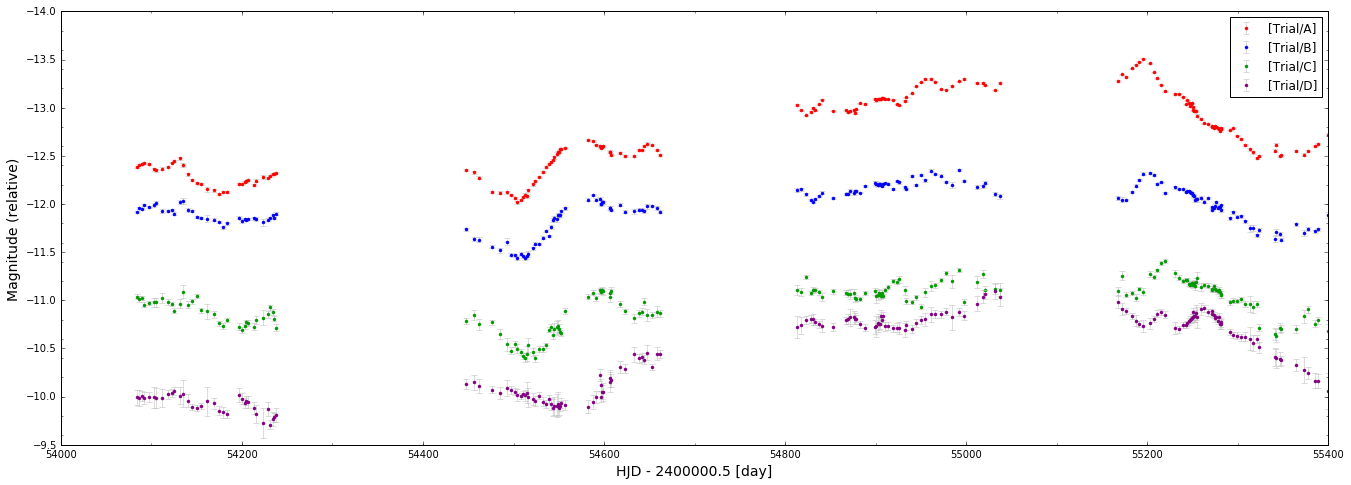

In [4]:
timer.display_light_curves()

Let's use the free-knot spline models for both the intrinsic (AGN) and extrinsic (microlensing) variability on your data, using the `PyCS` code and following the `PyCS` tutorial.

>You can also try `microlensing='polynomial'`.

>By default, `error=None` when calling `estimate_time_delays`:
>To find only the intrinsic variance: `error='intrinsic variance'`.
>To find the full error bars, the relationship between the points, and the instrinsic variance, use: `error='complete'`

In [5]:
timer.estimate_time_delays(method='pycs',microlensing='spline',agn='spline',error=None)

You are using the pycs method.
Starting opt_rough on initial delays :
AB   +0.00 | AC   +0.00 | AD   +0.00 | BC   +0.00 | BD   +0.00 | CD   +0.00
Aiming at first curve.
Starting ML optimization ...
Working on the spline ML of [Trial/A]|~3/u/7~|
Working on the spline ML of [Trial/B](0.000,-0.647,0)|~3/u/7~|
Working on the spline ML of [Trial/C](0.000,-1.603,0)|~3/u/7~|
Working on the spline ML of [Trial/D](0.000,-2.092,0)|~3/u/7~|
Done !
First spline and ML opt done.
AB   -5.00 | AC  -12.00 | AD  -10.00 | BC   -7.00 | BD   -5.00 | CD   +2.00    (Iteration  1, r2 =  10394.9)
AB   -9.00 | AC  -18.00 | AD  -18.00 | BC   -9.00 | BD   -9.00 | CD   +0.00    (Iteration  2, r2 =   9994.2)
AB  -10.00 | AC  -21.00 | AD  -24.00 | BC  -11.00 | BD  -14.00 | CD   -3.00    (Iteration  3, r2 =   9802.4)
AB  -11.00 | AC  -22.00 | AD  -29.00 | BC  -11.00 | BD  -18.00 | CD   -7.00    (Iteration  4, r2 =   9704.3)
AB  -12.00 | AC  -23.00 | AD  -33.00 | BC  -11.00 | BD  -21.00 | CD  -10.00    (Iteration  5,

In [6]:
timer.report_time_delays()

Time Delays:
AB   -4.56
AC  -21.21
AD  -68.37
BC  -16.65
BD  -63.80
CD  -47.15


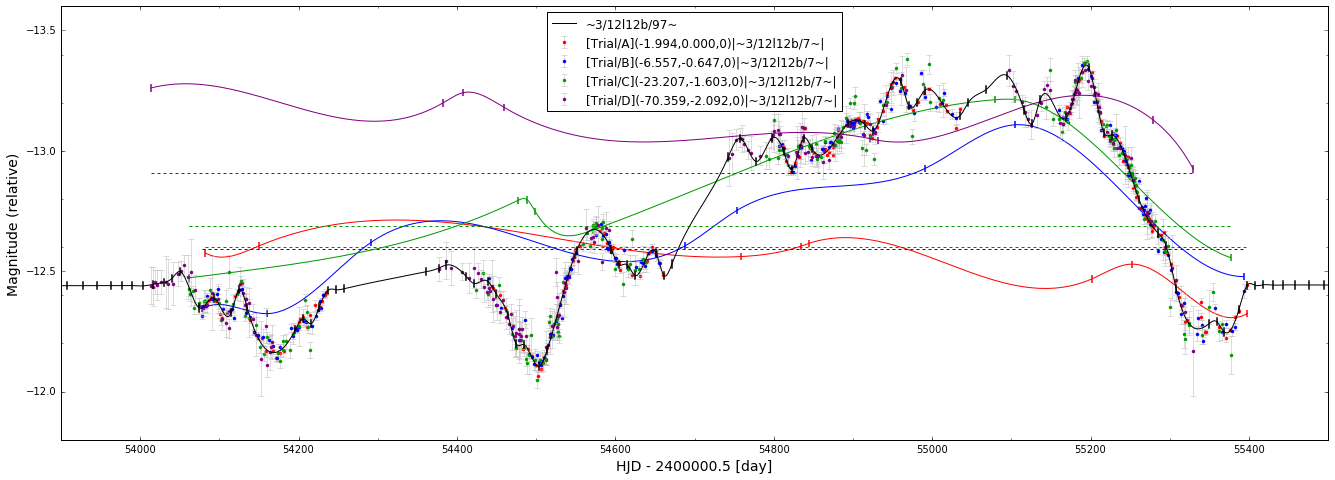

In [7]:
timer.display_light_curves()

While we could have estimated the time delay uncertainties above, with a command like
```python
timer.estimate_time_delays(method='pycs',microlensing='spline',agn='spline',error='complete')
```
we can still do the calculation, with the `estimate_uncertainties` method:

In [5]:
# timer.estimate_uncertainties(n=1,npkl=4)